In [2]:
import pandas as pd

# Load the dataset
penguins_data = pd.read_csv('/content/penguins_size.csv')  # Update the path

# Inspect the dataset
penguins_data.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean (or median, mode, etc.)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
penguins_data_imputed = imputer.fit_transform(penguins_data.select_dtypes(include=[np.number]))

# If there are categorical columns with missing values, fill them separately
for col in penguins_data.select_dtypes(include=['object']).columns:
    penguins_data[col].fillna(penguins_data[col].mode()[0], inplace=True)


In [5]:
# Dropping rows with NaN values
penguins_data_dropped = penguins_data.dropna()


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
encoder = LabelEncoder()
for col in penguins_data.select_dtypes(include=['object']).columns:
    penguins_data[col] = encoder.fit_transform(penguins_data[col])

# Normalizing the data
scaler = StandardScaler()
penguins_data_normalized = scaler.fit_transform(penguins_data)


In [13]:
# Identifying columns with NaN values
nan_columns = penguins_data.columns[penguins_data.isna().any()].tolist()
nan_columns

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [14]:
 # Reapplying imputation to specific columns
num_imputer = SimpleImputer(strategy='mean')

for col in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    penguins_data[col] = num_imputer.fit_transform(penguins_data[[col]])


In [15]:
# Check for NaN values in the dataset again
nan_columns_after_reimputation = penguins_data.columns[penguins_data.isna().any()].tolist()
nan_columns_after_reimputation


[]

In [17]:
import sklearn.manifold
from sklearn.manifold import LocallyLinearEmbedding

# Applying LLE
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
penguins_data_reduced = lle.fit_transform(penguins_data)

# Convert to DataFrame for visualization
penguins_data_reduced_df = pd.DataFrame(penguins_data_reduced, columns=['LLE1', 'LLE2'])


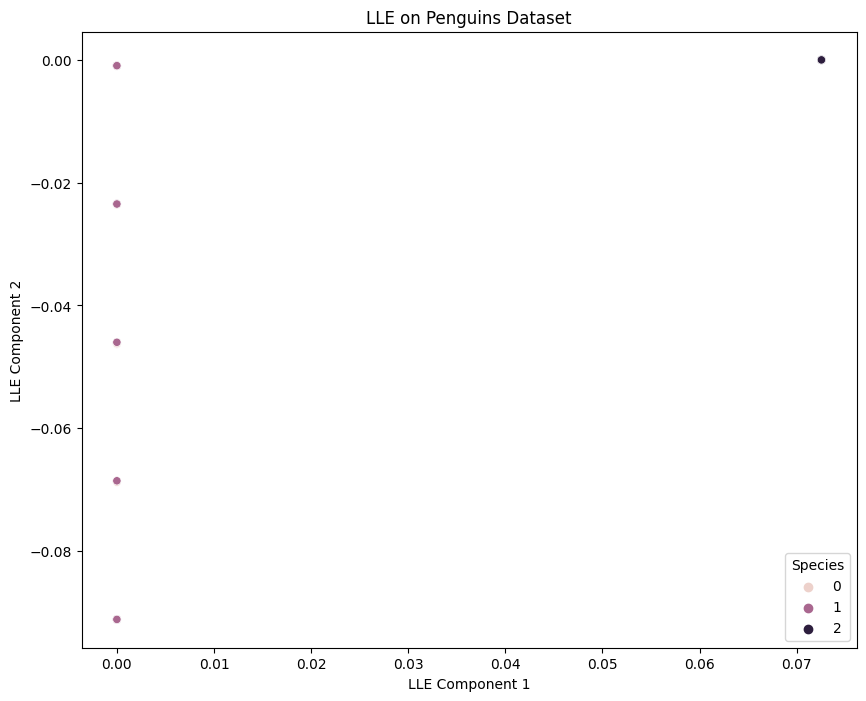

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='LLE1', y='LLE2', hue=penguins_data['species'], data=penguins_data_reduced_df)
plt.title('LLE on Penguins Dataset')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend(title='Species')
plt.show()


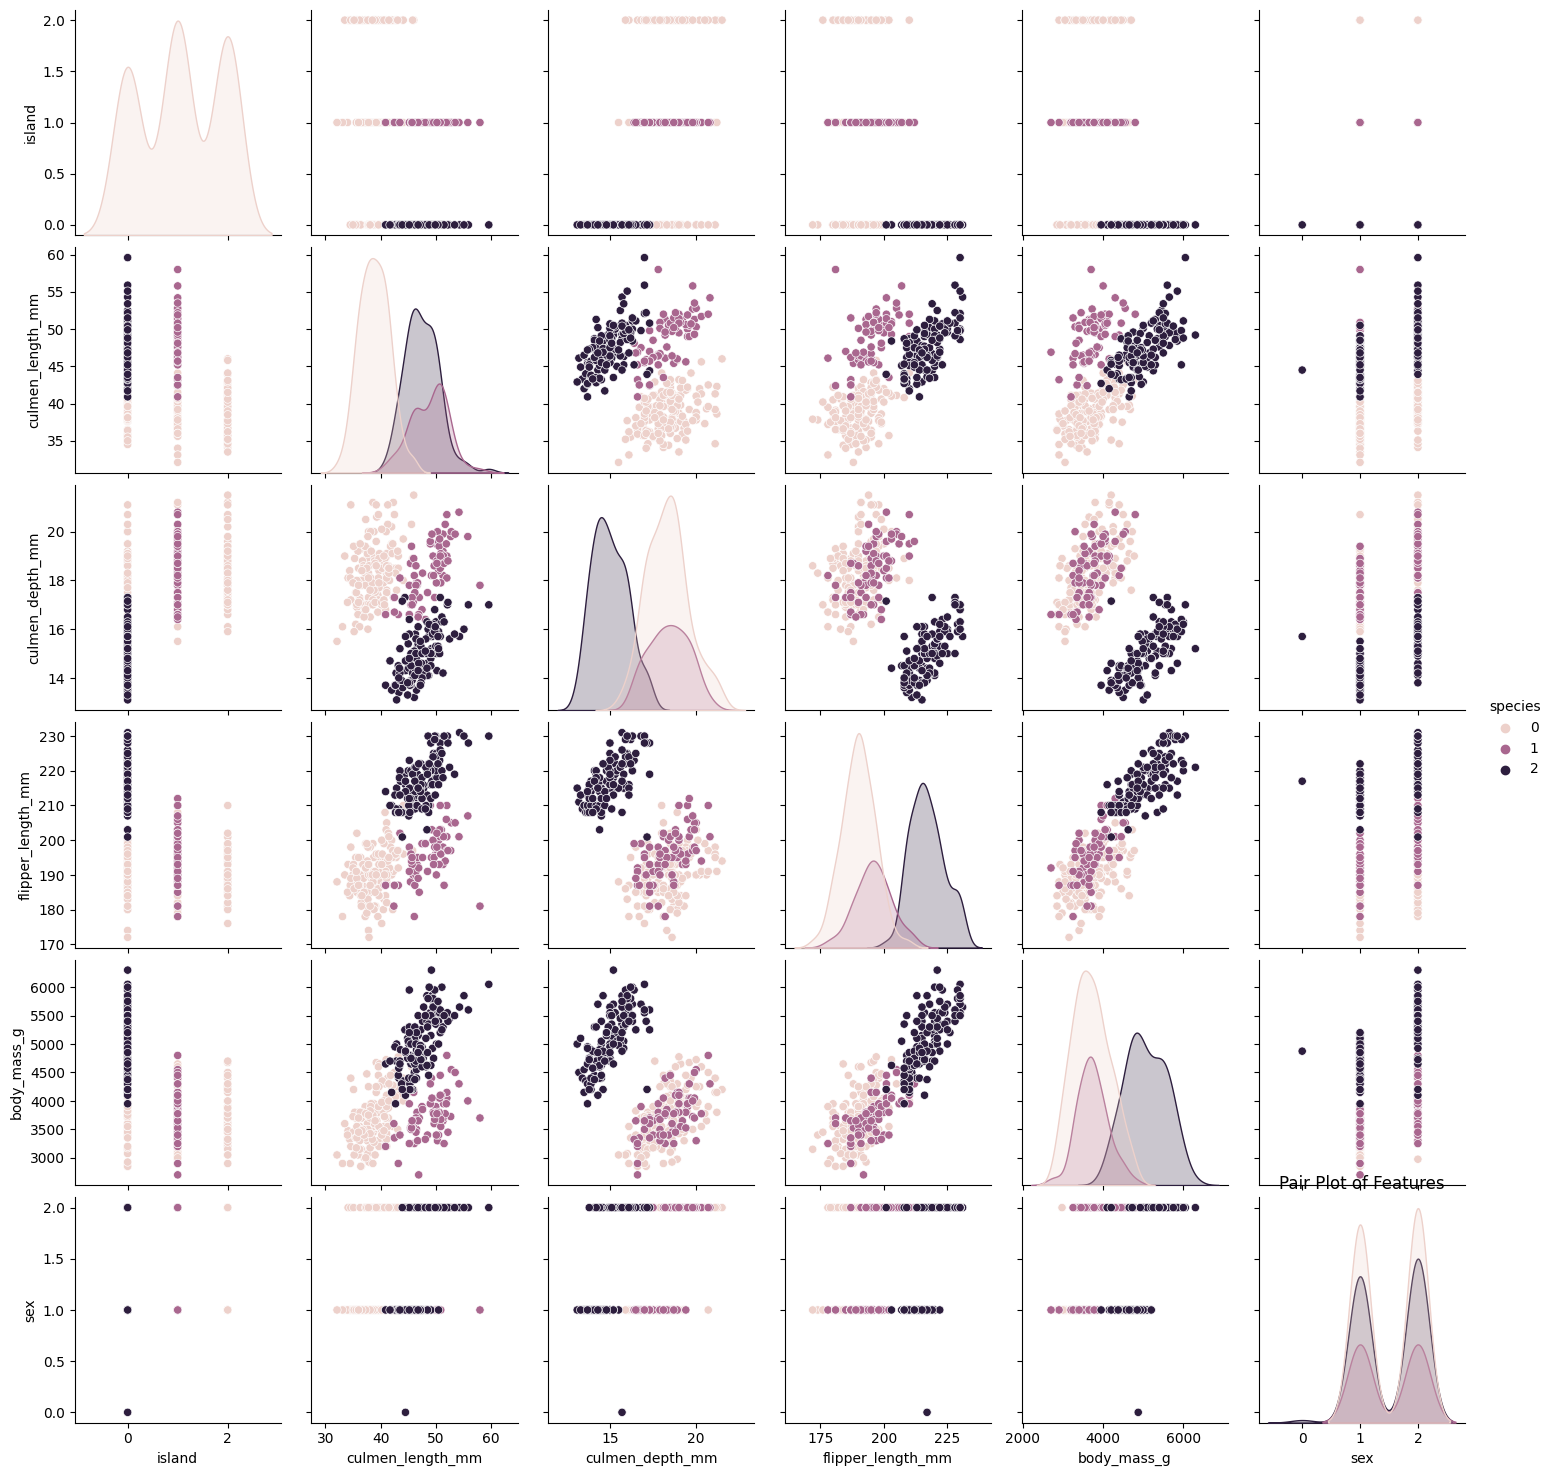

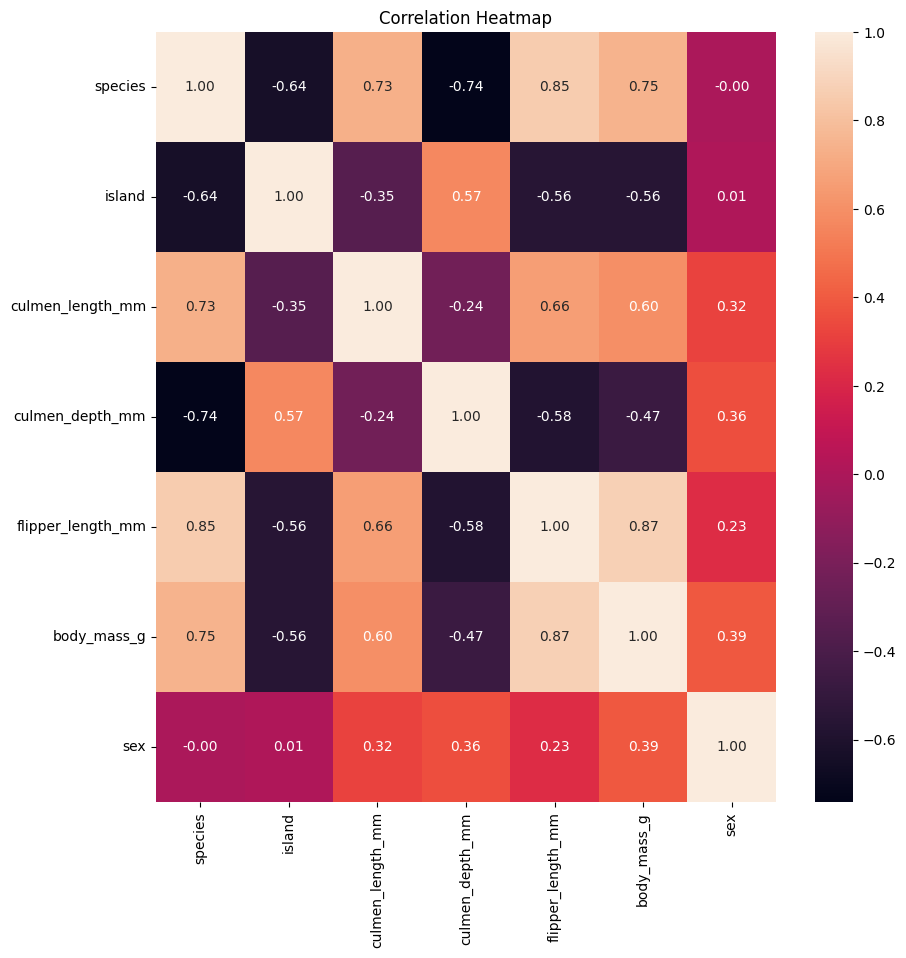

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
sns.pairplot(penguins_data, hue='species')  # Replace 'species' with your actual target column if different
plt.title('Pair Plot of Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(penguins_data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


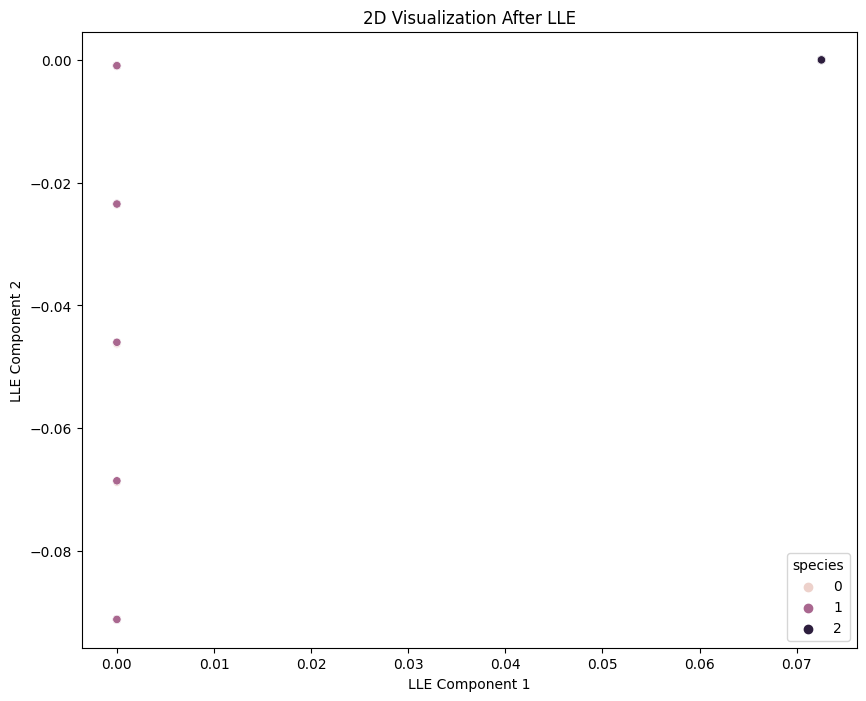

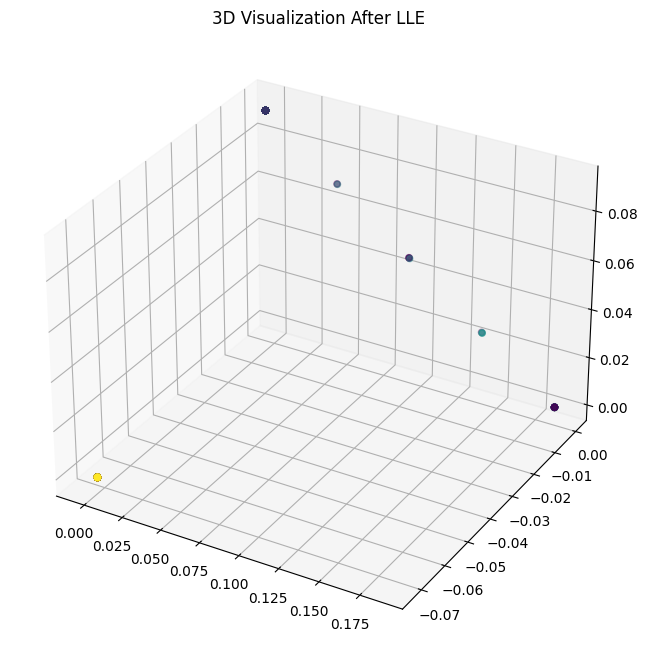

In [22]:
# 2D Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=penguins_data_reduced[:, 0], y=penguins_data_reduced[:, 1], hue=penguins_data['species'])  # Replace 'species'
plt.title('2D Visualization After LLE')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()

# 3D Scatter Plot (if reduced to 3 dimensions)
from mpl_toolkits.mplot3d import Axes3D

lle_3d = LocallyLinearEmbedding(n_neighbors=10, n_components=3)
penguins_data_reduced_3d = lle_3d.fit_transform(penguins_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(penguins_data_reduced_3d[:, 0], penguins_data_reduced_3d[:, 1], penguins_data_reduced_3d[:, 2], c=penguins_data['species'])  # Replace 'species_encoded'
plt.title('3D Visualization After LLE')
plt.show()
